In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
import csv
import mplcursors



DeSeqOutputAllConds = 'DeSeqOutputAllConds.tsv'
si2_si4_RNA_seq = 'si2-si4_RNA-seq-pipeline-output-normalized.tsv'

In [2]:
df = pd.read_csv(si2_si4_RNA_seq, sep = '\t')
sampleIDList = df.sampleID.unique()
gene_nameList = df.gene_name.unique()
#df['sampleID']
print(sampleIDList.size)
print(gene_nameList.size)
print(sampleIDList)

37
27311
['01-TGFb-low' '02-TGFb-med' '03-RA-low' '04-EtOH-highDensity'
 '05-EtOH-nlDensity' '06-RA-high' '07-EtOH-halfDensity'
 '08-TGFb-and-RA-low' '09-TGFb-and-RA-med' '10-TGFb-high'
 '11-TGFb-and-RA-high' '12-RA-med' '13-TGFb-and-RA-low'
 '14-EtOH-highDensity' '15-EtOH-nlDensity' '16-TGFb-med' '19-TGFb-low'
 '20-EtOH-halfDensity' '21-TGFb-and-RA-high' '22-TGFb-high' '23-RA-high'
 '24-RA-low' '25-EtOH-halfDensity' '26-RA-med' '27-EtOH-nlDensity'
 '28-TGFb-and-RA-med' '29-TGFb-and-RA-low' '30-TGFb-med' '31-TGFb-high'
 '32-RA-high' '33-TGFb-low' '34-EtOH-highDensity' '35-TGFb-and-RA-high'
 '36-RA-low' '46-EtOH-nlDensity' '51-RA-med' '52-TGFb-and-RA-med']


In [3]:
df_tpm = df.pivot_table(index='sampleID', columns='gene_name', values='tpm')
df_counts = df.pivot_table(index='sampleID', columns='gene_name', values='counts')

In [4]:
df_tpm

gene_name,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,hsa-mir-1253
sampleID,,,,,,,,,,,,,,,,,,,,,
01-TGFb-low,0.173789,0.000000,0.000000,0.142996,0.000000,12.655999,0.000000,41.556541,19.595986,0.000000,...,115.496303,2.623650,12.579761,38.562021,15.276613,18.725508,138.759788,32.709654,24.963592,0.0
02-TGFb-med,0.256809,0.000000,0.053716,0.187827,0.000000,8.389606,0.193634,40.773122,20.284874,0.000000,...,107.001881,3.084909,12.800057,35.285354,14.099820,19.032807,144.379176,33.368143,23.945374,0.0
03-RA-low,0.284760,0.000000,0.119126,0.000000,0.000000,13.695708,0.000000,47.232565,20.909718,0.227967,...,150.788679,2.681070,10.709442,32.303394,16.120514,24.258429,111.825303,33.000636,25.116405,0.0
04-EtOH-highDensity,0.460525,0.000000,0.115593,0.202094,0.000000,13.289530,0.000000,51.270951,20.266665,0.000000,...,171.607907,3.498645,9.891018,36.059704,16.114053,18.408119,67.712073,32.835254,22.733098,0.0
05-EtOH-nlDensity,0.240370,0.000000,0.150834,0.351608,0.000000,12.433255,0.000000,53.831841,20.821248,0.000000,...,186.267672,2.965481,10.946018,35.426278,16.616266,20.907572,67.937408,32.263193,22.840200,0.0
06-RA-high,0.257198,0.000000,0.268989,0.094056,0.335723,13.770471,0.000000,44.652816,21.041175,0.000000,...,125.794997,2.672073,9.206701,31.417482,15.072358,21.575277,111.456844,31.212431,24.934831,0.0
07-EtOH-halfDensity,0.000000,0.000000,0.056151,0.245427,0.350411,10.109765,0.000000,52.150592,20.647571,0.000000,...,197.324509,4.270617,9.913584,34.448625,18.862841,19.545773,74.844326,31.674890,23.359469,0.0
08-TGFb-and-RA-low,0.575673,0.000000,0.000000,0.000000,0.375716,7.574838,0.000000,38.918775,23.428292,0.000000,...,69.016296,4.485575,11.281623,37.615546,13.510658,22.785784,193.393094,30.912258,24.747723,0.0
09-TGFb-and-RA-med,0.410396,0.000000,0.000000,0.056280,0.000000,10.334634,0.000000,41.617615,22.550198,0.000000,...,63.086243,2.398315,9.344333,36.089878,14.097316,21.357742,195.236218,30.415553,24.730025,0.0


In [5]:
"""
df_tpm = pd.read_csv('tpmdata2.csv', delimiter = ',')
df_counts = pd.read_csv('countsdata.csv', delimiter = ',')
print(df_tpm.shape)
df_tpm = df_tpm.set_index('Unnamed: 0')
df_counts = df_counts.set_index('Unnamed: 0')
"""

"\ndf_tpm = pd.read_csv('tpmdata2.csv', delimiter = ',')\ndf_counts = pd.read_csv('countsdata.csv', delimiter = ',')\nprint(df_tpm.shape)\ndf_tpm = df_tpm.set_index('Unnamed: 0')\ndf_counts = df_counts.set_index('Unnamed: 0')\n"

In [6]:
"""
df_tpm = pd.DataFrame(index = sampleIDList ,columns = gene_nameList) # tpm
df_counts = pd.DataFrame(index = sampleIDList ,columns = gene_nameList) # counts
for r in range(0, sampleIDList.size):
    for c in range(0, gene_nameList.size):
        df3 = df[(df['sampleID'] == sampleIDList[r]) & (df['gene_name'] == gene_nameList[c])]
        df_tpm.at[sampleIDList[r], gene_nameList[c]] = df3.iat[0,6] #tpm is at [0,6]
        df_counts.at[sampleIDList[r], gene_nameList[c]] = df3.iat[0,3] #counts at [0,3]
"""
        

"\ndf_tpm = pd.DataFrame(index = sampleIDList ,columns = gene_nameList) # tpm\ndf_counts = pd.DataFrame(index = sampleIDList ,columns = gene_nameList) # counts\nfor r in range(0, sampleIDList.size):\n    for c in range(0, gene_nameList.size):\n        df3 = df[(df['sampleID'] == sampleIDList[r]) & (df['gene_name'] == gene_nameList[c])]\n        df_tpm.at[sampleIDList[r], gene_nameList[c]] = df3.iat[0,6] #tpm is at [0,6]\n        df_counts.at[sampleIDList[r], gene_nameList[c]] = df3.iat[0,3] #counts at [0,3]\n"

In [7]:
"""
pca = PCA(n_components = 37)
X_r = pca.fit_transform(df_tpm)
#pca.components_
print(pca.components_[:,0]) #PC1 loadings
print(pca.components_.shape)
#print(pca.score_samples(df_tpm).shape)
print(X_r.shape)# scores
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
#X_r
"""

'\npca = PCA(n_components = 37)\nX_r = pca.fit_transform(df_tpm)\n#pca.components_\nprint(pca.components_[:,0]) #PC1 loadings\nprint(pca.components_.shape)\n#print(pca.score_samples(df_tpm).shape)\nprint(X_r.shape)# scores\nprint(pca.explained_variance_ratio_)\nprint(np.sum(pca.explained_variance_ratio_))\n#X_r\n'

In [8]:
df_new = pd.DataFrame(index = ['A','B','C','A2','B2','C2','A3','B3','C3'], columns = gene_nameList)
df_new.loc['A',:] = df_tpm.iloc[9,:] - df_tpm.iloc[4,:]
df_new.loc['B',:] = df_tpm.iloc[5,:] - df_tpm.iloc[4,:]
df_new.loc['C',:] = df_tpm.iloc[10,:] - df_tpm.iloc[4,:]
df_new.loc['A2',:] = df_tpm.iloc[19,:] - df_tpm.iloc[4,:]
df_new.loc['B2',:] = df_tpm.iloc[20,:] - df_tpm.iloc[4,:]
df_new.loc['C2',:] = df_tpm.iloc[18,:] - df_tpm.iloc[4,:]
df_new.loc['A3',:] = df_tpm.iloc[28,:] - df_tpm.iloc[4,:]
df_new.loc['B3',:] = df_tpm.iloc[29,:] - df_tpm.iloc[4,:]
df_new.loc['C3',:] = df_tpm.iloc[32,:] - df_tpm.iloc[4,:]
df_new.GPRC5A

A     66.7481
B      80.815
C     177.166
A2    49.4518
B2    101.541
C2    160.689
A3    49.4981
B3    71.9089
C3    114.863
Name: GPRC5A, dtype: object

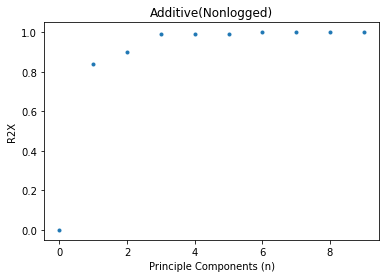

In [9]:
XSSE = []
XSSE.append(0)
index_no = df_new.columns.get_loc("GPRC5A") 
for i in range(1, 10):
    pca_loop = PCA(n_components = i)
    X_r = pca_loop.fit_transform(df_new)
    nComp = i
    Xhat = np.dot(X_r,pca_loop.components_)
    Xhat += pca_loop.mean_
    
    XSSE.append(1 - (np.sum((Xhat[:,index_no] - df_new.iloc[:,index_no])**2))/(np.sum((df_new.iloc[:,index_no])**2)))

plt.title("Additive(Nonlogged)")
plt.xlabel("Principle Components (n)")
plt.ylabel("R2X")
plt.plot(XSSE, '.')

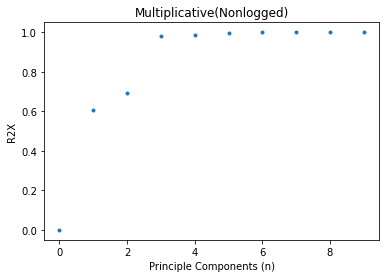

In [10]:
XSSE = []
XSSE.append(0)
index_no = df_new.columns.get_loc("RIPK4") 
for i in range(1, 10):
    pca_loop = PCA(n_components = i)
    X_r = pca_loop.fit_transform(df_new)
    nComp = i
    Xhat = np.dot(X_r,pca_loop.components_)
    Xhat += pca_loop.mean_
    
    XSSE.append(1 - (np.sum((Xhat[:,index_no] - df_new.iloc[:,index_no])**2))/(np.sum((df_new.iloc[:,index_no])**2)))

plt.title("Multiplicative(Nonlogged)")
plt.xlabel("Principle Components (n)")
plt.ylabel("R2X")
plt.plot(XSSE, '.')

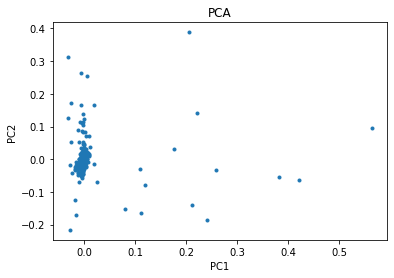

In [11]:
pca = PCA(n_components = 3)
X_r = pca.fit_transform(df_new)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA")
plt.plot(pca.components_[0, :], pca.components_[1, :], '.')

In [12]:
df_newlog = df_new
df_newlog.loc['C',:] = df_tpm.iloc[4,:]*(df_new.loc['C',:] - (df_new.loc['B',:] + df_new.loc['A',:]))
df_newlog.loc['C2',:] = df_tpm.iloc[4,:]*(df_new.loc['C2',:] - (df_new.loc['B2',:] + df_new.loc['A2',:]))
df_newlog.loc['C3',:] = df_tpm.iloc[4,:]*(df_new.loc['C3',:] - (df_new.loc['B3',:] + df_new.loc['A3',:]))
df_newlog = np.log(df_new.replace(0, np.nan))
df_newlog = df_newlog.replace(np.nan, 0)
df_newlog

<ipython-input-12-917316a0de8c>:5: RuntimeWarning: invalid value encountered in log
  df_newlog = np.log(df_new.replace(0, np.nan))


,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,AC093762.3,AL109936.8,AC068987.5,AP002512.4,OR4F29,AL139424.3,BX005132.2,AL139254.3,AL591163.1,AL589702.1
A,1.720446,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.393995,...,0.0,0.355210,0.0,0.0,0.0,-0.723892,0.0,0.0,0.0,0.0
B,0.000000,0.0,0.000000,0.684585,2.484504,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,-3.291366,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
C,4.700205,0.0,7.398349,4.044646,5.105219,0.0,0.0,7.957105,0.000000,6.520930,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
A2,1.908630,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.440691,...,0.0,0.256307,0.0,0.0,0.0,-1.381697,0.0,0.0,0.0,0.0
B2,0.000000,0.0,2.810449,0.908314,3.342881,0.0,0.0,0.790191,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.108509,0.0,0.0,0.0,0.0
C2,4.207652,0.0,0.000000,3.818580,0.000000,0.0,0.0,5.904021,3.900343,6.008655,...,0.0,-1.023469,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
A3,1.300206,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.741065,...,0.0,-0.717546,0.0,0.0,0.0,-1.465247,0.0,0.0,0.0,0.0
B3,0.000000,0.0,0.000000,0.590975,1.885693,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.499366,0.0,0.0,0.0,-4.077882,0.0,0.0,0.0,0.0
C3,4.494780,0.0,6.886845,0.000000,4.848338,0.0,0.0,8.121612,4.028637,5.014022,...,0.0,0.000000,0.0,0.0,0.0,-4.295336,0.0,0.0,0.0,0.0


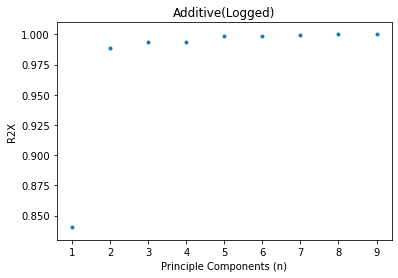

In [13]:
XSSE = []
n = []
#XSSE.append(0)
index_no = df_newlog.columns.get_loc("GPRC5A") 
for i in range(1, 10):
    pca_loop = PCA(n_components = i)
    X_r = pca_loop.fit_transform(df_newlog)
    nComp = i
    Xhat = np.dot(X_r,pca_loop.components_)
    Xhat += pca_loop.mean_
    
    XSSE.append(1 - (np.sum((Xhat[:,index_no] - df_newlog.iloc[:,index_no])**2))/(np.sum((df_newlog.iloc[:,index_no])**2)))
    n.append(i)

plt.title("Additive(Logged)")
plt.xlabel("Principle Components (n)")
plt.ylabel("R2X")
plt.ylim(0.83,1.01)
plt.plot(n, XSSE, '.')

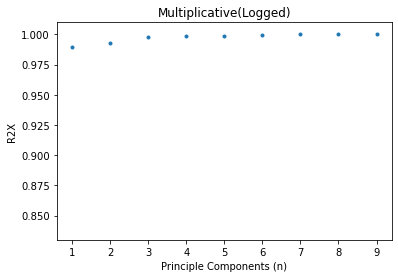

In [14]:
XSSE = []
n = []
#XSSE.append(0)
index_no = df_newlog.columns.get_loc("EPHB2") 
for i in range(1, 10):
    pca_loop = PCA(n_components = i)
    X_r = pca_loop.fit_transform(df_newlog)
    nComp = i
    Xhat = np.dot(X_r,pca_loop.components_)
    Xhat += pca_loop.mean_
    
    XSSE.append(1 - (np.sum((Xhat[:,index_no] - df_newlog.iloc[:,index_no])**2))/(np.sum((df_newlog.iloc[:,index_no])**2)))
    n.append(i)

plt.title("Multiplicative(Logged)")
plt.xlabel("Principle Components (n)")
plt.ylabel("R2X")
plt.ylim(0.83,1.01)
plt.plot(n, XSSE, '.')

(3, 27311)


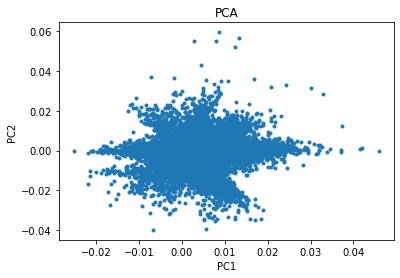

In [15]:
pcalog = PCA(n_components = 3)
X_r = pcalog.fit_transform(df_newlog)
print(pcalog.components_.shape)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA")
plt.plot(pcalog.components_[0, :], pcalog.components_[1, :], '.')

In [16]:
"""
XSSE = []
XSSE.append(0)
pca23 = PCA()
pca23.fit(df_tpm)
index_no = df_tpm.columns.get_loc("RIPK4") 
for i in range(1, 60):
    nComp = i
    Xhat = np.dot(pca23.transform(df_tpm)[:,:nComp], pca23.components_[:nComp,:])
    Xhat += pca23.mean_
    XSSE.append(1 - (np.sum((Xhat[:,index_no] - df_tpm.iloc[:,index_no])**2))/(np.sum((df_tpm.iloc[:,index_no])**2)))

plt.title("Multiplicative(Nonlogged)")
plt.xlabel("Principle Components (n)")
plt.ylabel("R2X")
plt.plot(XSSE, '.')
"""

'\nXSSE = []\nXSSE.append(0)\npca23 = PCA()\npca23.fit(df_tpm)\nindex_no = df_tpm.columns.get_loc("RIPK4") \nfor i in range(1, 60):\n    nComp = i\n    Xhat = np.dot(pca23.transform(df_tpm)[:,:nComp], pca23.components_[:nComp,:])\n    Xhat += pca23.mean_\n    XSSE.append(1 - (np.sum((Xhat[:,index_no] - df_tpm.iloc[:,index_no])**2))/(np.sum((df_tpm.iloc[:,index_no])**2)))\n\nplt.title("Multiplicative(Nonlogged)")\nplt.xlabel("Principle Components (n)")\nplt.ylabel("R2X")\nplt.plot(XSSE, \'.\')\n'

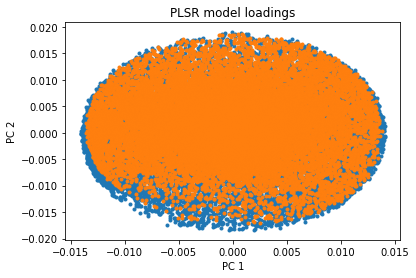

In [17]:
pls = PLSRegression(n_components = 2)
pls.fit_transform(df_tpm, df_counts) #fit tpm vs counts
# pls.fit_transform(df_tpm.iloc[:,:10000], df_counts.iloc[:,:10000]) #fit tpm vs counts
plt.title("PLSR model loadings")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.plot(pls.x_loadings_[:,0], pls.x_loadings_[:,1], '.')
plt.plot(pls.y_loadings_[:,0], pls.y_loadings_[:,1], '.')

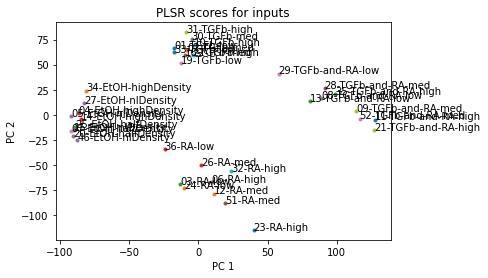

In [18]:
plt.title("PLSR scores for inputs")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
for i in range (0, 37):
    plt.plot(pls.x_scores_[i,0], pls.x_scores_[i,1], '.')

for i in range (0, 37):
    plt.annotate(sampleIDList[i],(pls.x_scores_[i,0], pls.x_scores_[i,1]))
#plt.plot(pls.x_scores_[:,0], pls.x_scores_[:,1], '.')
#plt.plot(pls.y_scores_[:,0], pls.y_scores_[:,1], '.')
# hover?

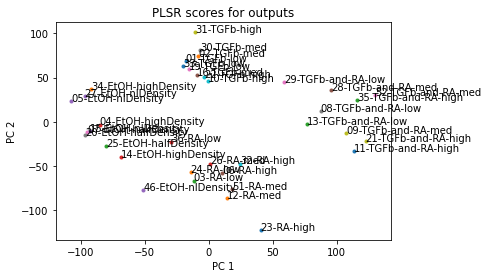

In [19]:
plt.title("PLSR scores for outputs")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
for i in range (0, 37):
    plt.plot(pls.y_scores_[i,0], pls.y_scores_[i,1], '.')

for i in range (0, 37):
    plt.annotate(sampleIDList[i],(pls.y_scores_[i,0], pls.y_scores_[i,1]))

In [20]:
print(pls.score(df_tpm, df_counts))

0.39839899983961913


In [21]:
print(pls.x_scores_.shape)
print(pls.y_scores_.shape)
print(pls.x_loadings_.shape)
print(pls.y_loadings_.shape)

(37, 2)
(37, 2)
(27311, 2)
(27311, 2)
